In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('darkgrid')

## Example 1

###Define a function f that represents the true (and unknown) mapping

In [3]:
# Define a function f that represents the true (and unknown) mapping
def f(x):
    return x * 2

### Collect some data points

In [4]:
# Sample 10 values of x from a uniform distribution between 0 and 1
np.random.seed(42)
x = np.random.uniform(0, 1, 10)
x

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [5]:
# Collect the corresponding target t_i for each x_i
t = f(x)
t

array([0.74908024, 1.90142861, 1.46398788, 1.19731697, 0.31203728,
       0.31198904, 0.11616722, 1.73235229, 1.20223002, 1.41614516])

### Plot the dataset

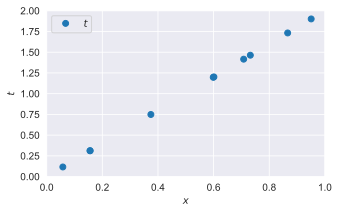

In [6]:
# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)
plt.legend()
plt.show()

### Our model


We employ a very simple model of the form:
\begin{equation}
y= f_w(x) = w_0x
\end{equation}

In [7]:
# We can compute w_0 from any pair of data points.
w_0 = (t[1] - t[0]) / (x[1] - x[0])
w_0

2.0

In [8]:
# Define our model:
def model(x, w_0):
    return w_0 * x

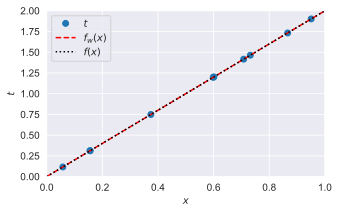

In [10]:
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)

# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x)$')

# Plot the target function
plt.plot([0, 1], [f(0), f(1)], 'k:',  label='$f(x)$')
plt.legend()
plt.show()

## Example 2

###Collect some data points

In [ ]:
# Sample 10 values of x from a uniform distribution between 0 and 1
np.random.seed(42)
x = np.random.uniform(0, 1, 10)
x

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [ ]:
# Collect the corresponding target t_i for each x_i

# Create the targets t with some Gaussian noises
noise = np.random.normal(0, 0.3, size=x.shape[0])
t = f(x) + noise
t

array([ 0.60823792,  2.06419663,  1.32496258,  1.05759804,  0.38462596,
       -0.26199503, -0.40130813,  1.56366603,  0.89838069,  1.51041936])

###Plot the dataset

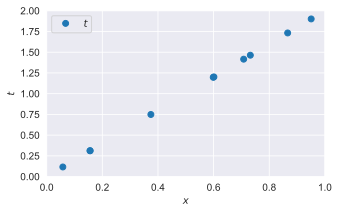

In [11]:
# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
# plt.plot([0, 1], [f(0), f(1)], 'r--', label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)
plt.legend()
plt.show()

### Make some guesses

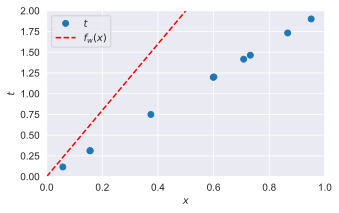

In [13]:
w_0 = 4.0
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)

# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x)$')

plt.legend()
plt.show()

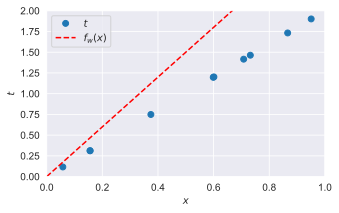

In [14]:
w_0 = 3.0
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)

# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x)$')

plt.legend()
plt.show()

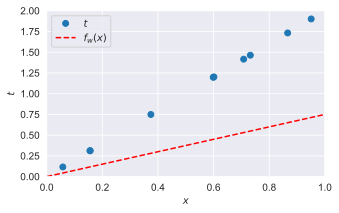

In [15]:
w_0 = 0.75
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)

# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x)$')

plt.legend()
plt.show()

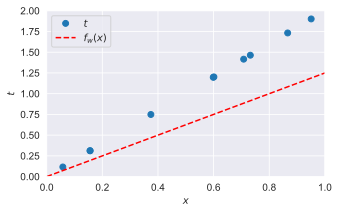

In [16]:
w_0 = 1.25
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)

# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x)$')

plt.legend()
plt.show()

### Define the loss function

\begin{equation}
L(w) = \frac{1}{N} \sum_{i=1}^N (t_i - y_i)^2 = \frac{1}{N}\sum_{i=1}^N L_i
\end{equation}

In [17]:
# Define the loss function
def loss(pred, t):
    return np.mean((t - pred)**2)

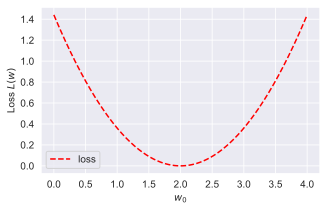

In [18]:
# Plot the loss versus different weight values of w_0

w_s = np.linspace(0, 4, num=1000) # weight values
losses = np.array([loss(model(x, w_0), t) for w_0 in w_s])

plt.figure(figsize=(5,3))
plt.plot(w_s, losses, 'r--', label='loss')
plt.xlabel('$w_0$')
plt.ylabel('Loss $L(w)$')
plt.legend()
plt.show()

**Question:** How to locate the value of $w_0$ at which the loss function attains the minimum value?

### Define the gradient of the loss function

\begin{equation}
L(w) = \frac{1}{N} \sum_{i=1}^N (t_i - y_i)^2 = \frac{1}{N}\sum_{i=1}^N L_i
\end{equation}

\begin{equation}
\frac{\partial L_i}{\partial w_0}=\frac{\partial y_i}{\partial w_0}\frac{\partial L_i}{\partial y_i}
\end{equation}

\begin{equation}
\frac{\partial L_i}{\partial y_i}=\frac{\partial(t_i-y_i)^2}{\partial y_i}=-2(t_i-y_i)=2(y_i-t_i)
\end{equation}

\begin{equation}
\frac{\partial y_i}{\partial w_0}=\frac{\partial (x_i\cdot w_0)}{\partial w_0}=x_i
\end{equation}

\begin{equation}
\frac{\partial L_i}{\partial w_0}=2x_i(y_i-t_i)
\end{equation}

\begin{equation}
\frac{\partial L}{\partial w_0}=\frac{1}{N}\sum_{i=1}^N2x_i(y_i-t_i)
\end{equation}

In [20]:
# Define the gradient
def gradient(w_0, x, t):
    return np.mean(2 * x * (model(x, w_0) - t))

### The Gradient Descent algorithm

In [21]:
# Initial weight values
w_0 = np.random.rand()

# Set the learning rate
alpha = 0.9

# Perform gradient descent
nb_of_iterations = 4
w_loss = [(w_0, loss(model(x, w_0), t))]

for i in range(nb_of_iterations):
    grad = gradient(w_0, x, t)
    w_0 = w_0 - alpha * grad
    w_loss.append((w_0, loss(model(x, w_0), t)))

In [22]:
# Print
for i in range(0, len(w_loss)):
    print(f'theta({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

theta(0): 0.0206 	 loss: 1.4118
theta(1): 1.3044 	 loss: 0.1743
theta(2): 1.7556 	 loss: 0.0215
theta(3): 1.9141 	 loss: 0.0027
theta(4): 1.9698 	 loss: 0.0003


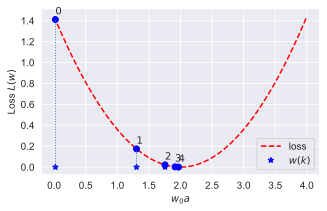

In [23]:
# Visualize the gradient descent updates
plt.figure(figsize=(5,3))
plt.plot(w_s, losses, 'r--', label='loss')

for i in range(0, len(w_loss)-1):
    w_1, c1 = w_loss[i]
    w_2, c2 = w_loss[i+1]
    plt.plot(w_1, c1, 'bo')
    plt.text(w_1, c1+0.05, f'${i}$')
    plt.plot(w_1, 0, 'b*')
    plt.vlines(x=w_1, ymin=0, ymax=c1, lw=1, ls='dotted' )

plt.plot(w_2, c2, 'bo' )
plt.text(w_2, c2+0.05, f'${i+1}$')
plt.plot(w_2, 0, 'b*', label='$w(k)$')
plt.vlines(x=w_2, ymin=0, ymax=c2, lw=1, ls='dotted')
plt.xlabel('$w_0a$')
plt.ylabel('Loss $L(w)$')
plt.legend()
plt.show()

Rerun with more iterations.

In [24]:
# Initial weight values
w_0 = np.random.rand()

# Set the learning rate
alpha = 0.9

# Perform gradient descent
nb_of_iterations = 20
w_loss = [(w_0, loss(model(x, w_0), t))]

for i in range(nb_of_iterations):
    grad = gradient(w_0, x, t)
    w_0 = w_0 - alpha * grad
    w_loss.append((w_0, loss(model(x, w_0), t)))

# Print
for i in range(0, len(w_loss)):
    print(f'theta({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

theta(0): 0.9699 	 loss: 0.3823
theta(1): 1.6380 	 loss: 0.0472
theta(2): 1.8728 	 loss: 0.0058
theta(3): 1.9553 	 loss: 0.0007
theta(4): 1.9843 	 loss: 0.0001
theta(5): 1.9945 	 loss: 0.0000
theta(6): 1.9981 	 loss: 0.0000
theta(7): 1.9993 	 loss: 0.0000
theta(8): 1.9998 	 loss: 0.0000
theta(9): 1.9999 	 loss: 0.0000
theta(10): 2.0000 	 loss: 0.0000
theta(11): 2.0000 	 loss: 0.0000
theta(12): 2.0000 	 loss: 0.0000
theta(13): 2.0000 	 loss: 0.0000
theta(14): 2.0000 	 loss: 0.0000
theta(15): 2.0000 	 loss: 0.0000
theta(16): 2.0000 	 loss: 0.0000
theta(17): 2.0000 	 loss: 0.0000
theta(18): 2.0000 	 loss: 0.0000
theta(19): 2.0000 	 loss: 0.0000
theta(20): 2.0000 	 loss: 0.0000


Plot the resulting model

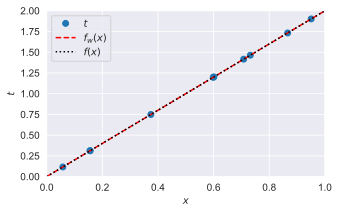

In [25]:
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xlim(0,1)
plt.ylim(0,2)

# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x)$')

# Plot the target function
plt.plot([0, 1], [f(0), f(1)], 'k:',  label='$f(x)$')
plt.legend()
plt.show()

## Example 3

### Define a function f that represents the true (and unknown) mapping


In [3]:
import numpy as np
import matplotlib.pyplot as plt
m = 3
b = 2
def f(x):
    return 3 * x + 2

### Collect some data points for training

In [4]:
# Sample 20 values from a uniform distribution between 0 and 1
n = 50
np.random.seed(4)
x = np.random.uniform(0, 1, n)

# Create the targets t with some Gaussian noises
noise = np.random.normal(0, 0.5, size=x.shape[0])
t = f(x) + noise

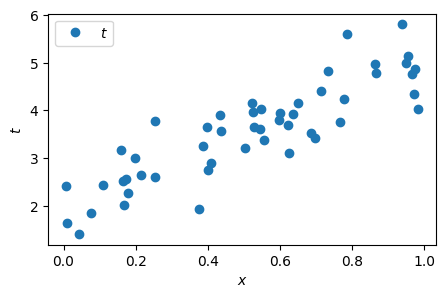

In [5]:
# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
# plt.plot([0, 1], [f(0), f(1)], 'r--', label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

In [6]:
# Plot the loss versus different weight values of w_0

w_s = np.linspace(0, 10, num=1000) # weight values
losses = np.array([loss(model(x, w_0), t) for w_0 in w_s])

plt.figure(figsize=(5,3))
plt.plot(w_s, losses, 'r--', label='loss')
plt.xlabel('$w_0$')
plt.ylabel('Loss $L(w)$')
plt.legend()
plt.show()

NameError: name 'loss' is not defined

### Perform Gradient Descent

In [ ]:
# Initial weight values
w_0 = np.random.rand()

# Set the learning rate
alpha = 0.1

# Perform gradient descent
nb_of_iterations = 10
w_loss = [(w_0, loss(model(x, w_0), t))]

for i in range(nb_of_iterations):
    grad = gradient(w_0, x, t)
    w_0 = w_0 - alpha * grad
    w_loss.append((w_0, loss(model(x, w_0), t)))

# Print
for i in range(0, len(w_loss)):
    print(f'theta({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

theta(0): 0.4190 	 loss: 12.0716
theta(1): 0.8114 	 loss: 10.5868
theta(2): 1.1760 	 loss: 9.3042
theta(3): 1.5149 	 loss: 8.1964
theta(4): 1.8298 	 loss: 7.2395
theta(5): 2.1225 	 loss: 6.4129
theta(6): 2.3946 	 loss: 5.6990
theta(7): 2.6474 	 loss: 5.0824
theta(8): 2.8824 	 loss: 4.5497
theta(9): 3.1007 	 loss: 4.0896
theta(10): 3.3037 	 loss: 3.6922


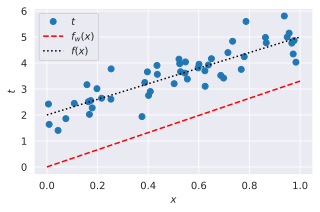

In [ ]:
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')


# Plot our model
plt.plot([0, 1], [model(0, w_0), model(1, w_0)], 'r--', label='$f_w(x)$')

# Plot the target function
plt.plot([0, 1], [f(0), f(1)], 'k:',  label='$f(x)$')
plt.legend()
plt.show()

## Example 4

### We define a new model of the form

\begin{equation}
y = f_w(x) = w_0 + w_1x
\end{equation}

In [ ]:
# Re-arrange our data points into matrix

X = np.array((np.ones_like(x), x)).T
print(X.shape)
X

(50, 2)


array([[1.        , 0.96702984],
       [1.        , 0.54723225],
       [1.        , 0.97268436],
       [1.        , 0.71481599],
       [1.        , 0.69772882],
       [1.        , 0.2160895 ],
       [1.        , 0.97627445],
       [1.        , 0.00623026],
       [1.        , 0.25298236],
       [1.        , 0.43479153],
       [1.        , 0.77938292],
       [1.        , 0.19768507],
       [1.        , 0.86299324],
       [1.        , 0.98340068],
       [1.        , 0.16384224],
       [1.        , 0.59733394],
       [1.        , 0.0089861 ],
       [1.        , 0.38657128],
       [1.        , 0.04416006],
       [1.        , 0.95665297],
       [1.        , 0.43614665],
       [1.        , 0.94897731],
       [1.        , 0.78630599],
       [1.        , 0.8662893 ],
       [1.        , 0.17316542],
       [1.        , 0.07494859],
       [1.        , 0.60074272],
       [1.        , 0.16797218],
       [1.        , 0.73338017],
       [1.        , 0.40844386],
       [1.

In [ ]:
# Define our model
def model(X, w):
    return X @ w

In [ ]:
# Define the gradient
def gradient(theta, X, t):
    return 2 * X.T @ (model(X, theta) - t)

### Run Gradient Descent algorithm

In [ ]:
# Initialize GD
np.random.seed(42)
w = np.random.randn(2)
alpha = 0.01
losses = []
params = []

losses.append(loss(model(X, w), t))
params.append(w.copy())
print(f'Iter. 0:\t w[0]={w[0]:.4f} \t w[1]={w[1]:.4f} \t Loss: {losses[-1]:.4f}')
# Run GD for a number of steps
nb_iterations = 50
for i in range(nb_iterations):
    grad = gradient(w, X, t)
    w = w - alpha * grad
    losses.append(loss(model(X, w), t))
    params.append(w.copy())
    print(f'Iter. {i+1}:\t w[0]={w[0]:.4f} \t w[1]={w[1]:.4f} \t Loss: {losses[-1]:.4f}')
# Print

Iter. 0:	 w[0]=0.4967 	 w[1]=-0.1383 	 Loss: 10.9979
Iter. 1:	 w[0]=3.6405 	 w[1]=1.7624 	 Loss: 1.3651
Iter. 2:	 w[0]=2.6544 	 w[1]=1.3610 	 Loss: 0.5380
Iter. 3:	 w[0]=2.8626 	 w[1]=1.6130 	 Loss: 0.4446
Iter. 4:	 w[0]=2.7319 	 w[1]=1.6679 	 Loss: 0.4151
Iter. 5:	 w[0]=2.7034 	 w[1]=1.7713 	 Loss: 0.3936
Iter. 6:	 w[0]=2.6498 	 w[1]=1.8529 	 Loss: 0.3752
Iter. 7:	 w[0]=2.6074 	 w[1]=1.9335 	 Loss: 0.3592
Iter. 8:	 w[0]=2.5656 	 w[1]=2.0077 	 Loss: 0.3451
Iter. 9:	 w[0]=2.5271 	 w[1]=2.0774 	 Loss: 0.3329
Iter. 10:	 w[0]=2.4910 	 w[1]=2.1424 	 Loss: 0.3222
Iter. 11:	 w[0]=2.4572 	 w[1]=2.2032 	 Loss: 0.3128
Iter. 12:	 w[0]=2.4257 	 w[1]=2.2601 	 Loss: 0.3046
Iter. 13:	 w[0]=2.3962 	 w[1]=2.3132 	 Loss: 0.2975
Iter. 14:	 w[0]=2.3686 	 w[1]=2.3629 	 Loss: 0.2912
Iter. 15:	 w[0]=2.3428 	 w[1]=2.4094 	 Loss: 0.2858
Iter. 16:	 w[0]=2.3187 	 w[1]=2.4528 	 Loss: 0.2810
Iter. 17:	 w[0]=2.2962 	 w[1]=2.4934 	 Loss: 0.2768
Iter. 18:	 w[0]=2.2751 	 w[1]=2.5314 	 Loss: 0.2732
Iter. 19:	 w[0]=2.25

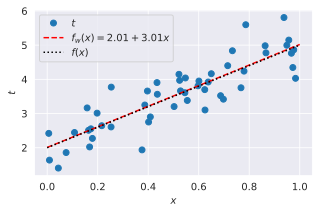

In [ ]:
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')


# Plot our model
plt.plot([0, 1], [model([[1,0]], w), model([[1,1]], w)], 'r--', label=f'$f_w(x)={w[0]:.2f} + {w[1]:.2f}x$')

# Plot the target function
plt.plot([0, 1], [f(0), f(1)], 'k:',  label='$f(x)$')
plt.legend()
plt.show()

### Plot several models with weight values found by the GD algorithm.

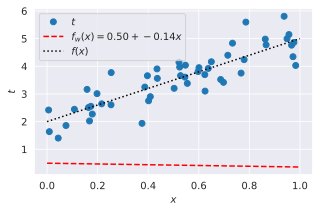

In [ ]:
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')


# Plot our model
plt.plot([0, 1], [model([[1,0]], params[0]), model([[1,1]], params[0])], 'r--', label=f'$f_w(x)={params[0][0]:.2f} + {params[0][1]:.2f}x$')

# Plot the target function
plt.plot([0, 1], [f(0), f(1)], 'k:',  label='$f(x)$')
plt.legend()
plt.show()

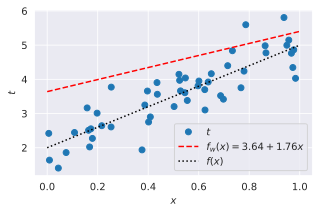

In [ ]:
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')


# Plot our model
plt.plot([0, 1], [model([[1,0]], params[1]), model([[1,1]], params[1])], 'r--', label=f'$f_w(x)={params[1][0]:.2f} + {params[1][1]:.2f}x$')

# Plot the target function
plt.plot([0, 1], [f(0), f(1)], 'k:',  label='$f(x)$')
plt.legend()
plt.show()

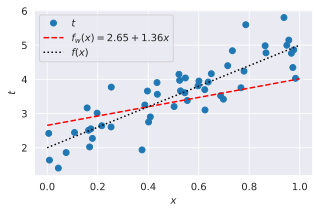

In [ ]:
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')


# Plot our model
plt.plot([0, 1], [model([[1,0]], params[2]), model([[1,1]], params[2])], 'r--', label=f'$f_w(x)={params[2][0]:.2f} + {params[2][1]:.2f}x$')

# Plot the target function
plt.plot([0, 1], [f(0), f(1)], 'k:',  label='$f(x)$')
plt.legend()
plt.show()

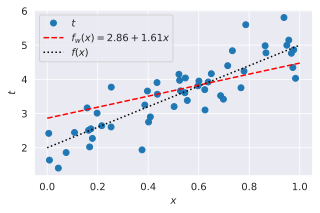

In [ ]:
# Plot the dataset
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.xlabel('$x$')
plt.ylabel('$t$')


# Plot our model
plt.plot([0, 1], [model([[1,0]], params[3]), model([[1,1]], params[3])], 'r--', label=f'$f_w(x)={params[3][0]:.2f} + {params[3][1]:.2f}x$')

# Plot the target function
plt.plot([0, 1], [f(0), f(1)], 'k:',  label='$f(x)$')
plt.legend()
plt.show()

### Plot the loss surface

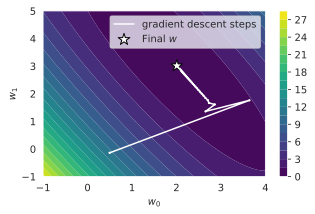

In [ ]:
# Show loss surface
nb_of_ws = 50
wsa = np.linspace(-1, 4, num=nb_of_ws) # w_0
wsb = np.linspace(-1, 5, num=nb_of_ws) # w_1
ws_x, ws_y = np.meshgrid(wsa, wsb)
loss_ws = np.zeros((nb_of_ws, nb_of_ws))

for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        weights = np.asarray([ws_x[i,j], ws_y[i,j]])
        loss_ws[i, j] = loss(model(X, weights), t)

# plot the loss function surface
plt.figure(figsize=(5,3))
cont = plt.contourf(ws_x, ws_y, loss_ws, 20, cmap=cm.viridis)

# plot gradient descent
params_arr = np.vstack(params)
plt.scatter(params_arr[:,0], params_arr[:,1], color='w', s=2)
plt.plot(params_arr[:,0], params_arr[:,1], 'w-', label='gradient descent steps')
plt.scatter([params_arr[-1,0]],[params_arr[-1,1]], color='w', marker='*', s=150, edgecolor='black', label='Final $w$')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

cbar = plt.colorbar(cont)
plt.legend()
plt.show()